In [175]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
import os
import shutil
import scipy.stats as stats

In [ ]:
np.random.seed(56298)
numOfParticles=500
radius=0.5
dt=0.01
length=50
iniVel=500
time=60
r=(np.random.random(size=(numOfParticles,2))-0.5)*2*length
ids = np.arange(numOfParticles)
vels=np.zeros_like(r)


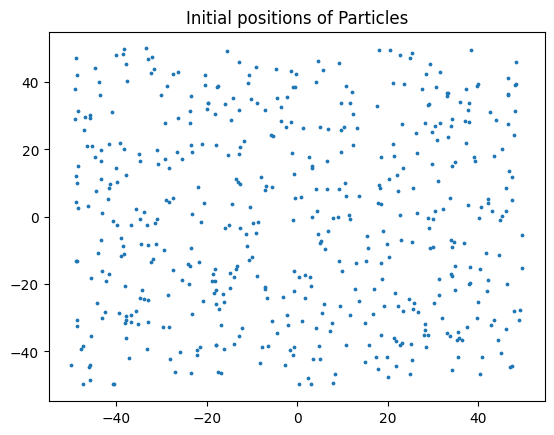

In [161]:
plt.scatter(r[:,0],r[:,1],s=3)
plt.title("Initial positions of Particles")
plt.show()


if(not(os.path.exists("Outcomes/"))):
    os.makedirs("Outcomes/")

else:
    shutil.rmtree("Outcomes/")
    os.makedirs("Outcomes/")

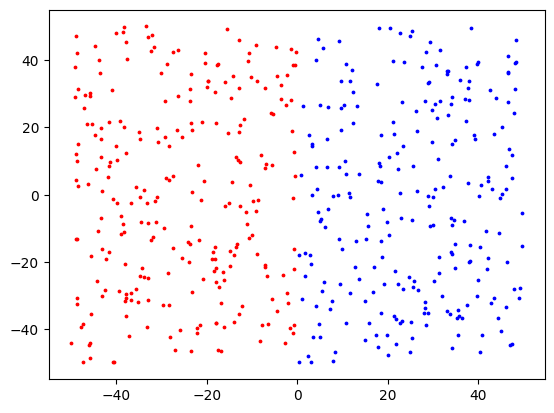

In [162]:
right=r[:,0]>0
left=r[:,0]<=0
leftParticles=r[left]
rightParticles=r[right]
vels[left,0]  =  iniVel
vels[right,0] = -iniVel
vels[:,0]=vels[:,0]+np.random.random(vels.shape[0])
plt.scatter(rightParticles[:,0],rightParticles[:,1],s=3, color="blue")
plt.scatter(leftParticles[:,0],leftParticles[:,1],s=3, color="red")
plt.show()

In [163]:
def Collpairsfunc(r,ids=ids):
    allCombidx=list(combinations(ids,2))
    allCombidx=np.asarray(allCombidx)
    combPosition=list(combinations(r,2))
    combDistance=np.array([np.sqrt(pow((i[0][0]-i[1][0]),2)+pow((i[0][1]-i[1][1]),2)) for i in combPosition])
    isCollision=combDistance<=2*radius
    collPairs=allCombidx[isCollision]
    return collPairs

collPairs=Collpairsfunc(ids=ids,r=r)

print(len(collPairs))

45


$$\boxed{
\vec v_1^{\,\text{new}}
=
\vec v_1
-
\frac{(\vec v_1 - \vec v_2)\cdot(\vec r_1 - \vec r_2)}
{|\vec r_1 - \vec r_2|^2}
(\vec r_1 - \vec r_2)
}$$

$$\boxed{
\vec v_2^{\,\text{new}}
=
\vec v_2
-
\frac{(\vec v_2 - \vec v_1)\cdot(\vec r_2 - \vec r_1)}
{|\vec r_1 - \vec r_2|^2}
(\vec r_2 - \vec r_1)
}$$

In [164]:
def newVelocity(vels,r):
    collPairs=Collpairsfunc(r)
    for pair in collPairs:
        m1=pair[0]
        m2=pair[1]
        v1=vels[m1,:]
        r1=r[m1,:]
        v2=vels[m2,:]
        r2=r[m2,:]
        relPos=r1-r2+1e-10
        relVels=v1-v2
        v1Dash = v1- ((np.dot((relVels),relPos))/(pow(np.linalg.norm(relPos),2))*(relPos))
        v2Dash = v2- ((np.dot((-1*relVels),-1*relPos))/(pow(np.linalg.norm(relPos),2))*(-1*relPos))
        vels[m1,:]=v1Dash
        vels[m2,:]=v2Dash
    return vels

In [165]:
def update(r,vels,dt=dt):
    r=r+(vels*dt) #type:ignore
    xRight=r[:,0]> length
    xLeft=r[:,0]< -length
    yTop=r[:,1]> length
    yBottom=r[:,1]< -length
    vels[xRight,0] *= -1
    vels[xLeft,0]  *= -1
    vels[yBottom,1]   *= -1
    vels[yTop,1]*= -1
    r[xRight,0] = 2*length- r[xRight,0]
    r[xLeft,0] = -2*length- r[xLeft,0]
    r[yTop,1]  = 2*length- r[yTop,1]
    r[yBottom,1] = -2*length- r[yBottom,1]
    vels = newVelocity(vels, r)
    return r,vels

nowTime=0
while(nowTime<=time):
    if( (nowTime%0.5==0)):
        magvels=np.linalg.norm(vels,axis=1)
        plt.figure(figsize=(8,4.5))
        plt.hist(magvels,bins=20,color="#8E2EC7",linewidth=1,edgecolor="white",label=f"Mean={round(np.mean(magvels),2)}\nVariance: {round(np.var(magvels),2)}")
        plt.title(f"Histogram at time {nowTime}")
        plt.legend(loc="upper right")
        plt.savefig(f"Outcomes\\Histogram-'{nowTime} s'.png")
        plt.close()
    r,vels=update(r,vels)
    nowTime= round(nowTime,2)+dt


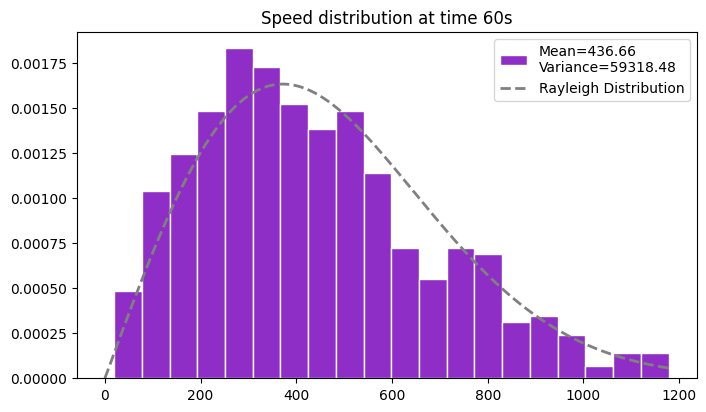

In [187]:

if(not(os.path.exists("Outcomes/"))):
    os.makedirs("Outcomes/")

else:
    shutil.rmtree("Outcomes/")
    os.makedirs("Outcomes/")

plt.figure(figsize=(8,4.5))

plt.hist(
    magvels,
    bins=20,
    density=True,
    color="#8E2EC7",
    edgecolor="white",
    label=f"Mean={np.mean(magvels):.2f}\nVariance={np.var(magvels):.2f}"
)

sigma = np.std(magvels)/0.655
x = np.linspace(0, max(magvels), 400)
pdf = stats.rayleigh(scale=sigma).pdf(x)
plt.plot(x, pdf, linestyle="--",color="grey", linewidth=2, label="Rayleigh Distribution")

plt.title(f"Speed distribution at time {time}s")
plt.legend()
plt.savefig("Outcomes 0/Final_Histogram.png")
